<a href="https://colab.research.google.com/github/Giovannacm/machine-learning/blob/main/GMM_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

In [ ]:
class GMM:
  def __init__(self, n_components, max_iter=100):
    self.n_componets = n_components
    self.max_iter = max_iter
    self.comp_names = [index for index in range(self.n_componets)]
    self.w = [1/self.n_componets for comp in range(self.n_componets)]

  def multivariate_normal(self, X, mean_vector, covariance_matrix):
    return (2*np.pi)**(-len(X)/2)*np.linalg.det(covariance_matrix)**(-1/2)*np.exp(-np.dot(np.dot((X-mean_vector).T, np.linalg.inv(covariance_matrix)), (X-mean_vector))/2)

  def fit(self, X):
    new_X = np.array_split(X, self.n_componets)  
    self.mean_vector = [np.mean(x, axis=0) for x in new_X]
    self.covariance_matrixes = [np.cov(x.T) for x in new_X]
    del new_X 

    for iteration in range(self.max_iter):
      # Expectation (E) step: compute the scores
      self.r = np.zeros((len(X), self.n_componets))
      for n in range(len(X)):
        for k in range(self.n_componets):
          self.r[n][k] = self.w[k] * self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
          self.r[n][k] /= sum([self.w[j]*self.multivariate_normal(X[n], self.mean_vector[j], self.covariance_matrixes[j]) for j in range(self.n_componets)])

      # Maximization (M) step: given the scores, fit 0 for each cluster
      N = np.sum(self.r, axis=0)

      self.mean_vector = np.zeros((self.n_componets, len(X[0])))
      for k in range(self.n_componets):
        for n in range(len(X)):
          self.mean_vector[k] += self.r[n][k] * X[n]
      self.mean_vector = [1/N[k]*self.mean_vector[k] for k in range(self.n_componets)]

      self.covariance_matrixes = [np.zeros((len(X[0]), len(X[0]))) for k in range(self.n_componets)]
      for k in range(self.n_componets):
        self.covariance_matrixes[k] = np.cov(X.T, aweights=(self.r[:, k]), ddof=0)
      self.covariance_matrixes = [1/N[k]*self.covariance_matrixes[k] for k in range(self.n_componets)]

      self.w = [N[k]/len(X) for k in range(self.n_componets)]

  def predict(self, X):
    probas = []
    for n in range(len(X)):
      probas.append([self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k]) for k in range(self.n_componets)])

    cluster = []
    for proba in probas:
      cluster.append(self.comp_names[proba.index(max(proba))])

    return cluster

In [ ]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=2, centers=3)

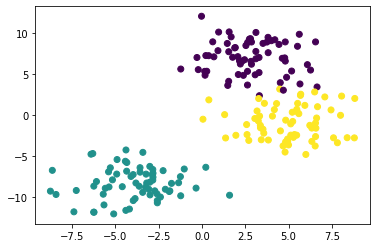

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
gm = GaussianMixture(n_components=3)
gm.fit(X)

GaussianMixture(n_components=3)

In [ ]:
y_pred = gm.predict(X)

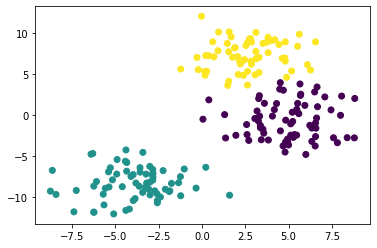

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [ ]:
gmm = GMM(n_components=3)
gmm.fit(X)

In [ ]:
y_pred_2 = gmm.predict(X)

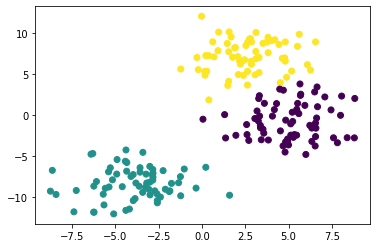

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_2)
plt.show()

References: 
- https://towardsdatascience.com/gaussian-mixture-models-implemented-from-scratch-1857e40ea566